In [1]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
import os
import pandas as pd
import warnings
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]
warnings.filterwarnings("ignore")


In [4]:
!kaggle datasets download -d mridul18/face-detection

face-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip "*.zip"

Streaming output truncated to the last 5000 lines.
  inflating: face_detection/not_mridul/image (3865).jpg  
  inflating: face_detection/not_mridul/image (3866).jpg  
  inflating: face_detection/not_mridul/image (3867).jpg  
  inflating: face_detection/not_mridul/image (3868).jpg  
  inflating: face_detection/not_mridul/image (3869).jpg  
  inflating: face_detection/not_mridul/image (387).jpg  
  inflating: face_detection/not_mridul/image (3870).jpg  
  inflating: face_detection/not_mridul/image (3871).jpg  
  inflating: face_detection/not_mridul/image (3872).jpg  
  inflating: face_detection/not_mridul/image (3873).jpg  
  inflating: face_detection/not_mridul/image (3874).jpg  
  inflating: face_detection/not_mridul/image (3875).jpg  
  inflating: face_detection/not_mridul/image (3876).jpg  
  inflating: face_detection/not_mridul/image (3877).jpg  
  inflating: face_detection/not_mridul/image (3878).jpg  
  inflating: face_detection/not_mridul/image (3879).jpg  
  inflating: face_dete

In [6]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
my_dir="/content/drive/My Drive/dl_projects/FaceRecognition"

In [9]:
predictor = load_learner(my_dir)

In [10]:
def my_predictor(im):
  test_img =open_image(im)
  pred_class,pred_idx,outputs=predictor.predict(test_img)
  return pred_class

In [11]:
import dlib
import cv2
import os
from imutils import face_utils
from PIL import Image
face_detector = dlib.get_frontal_face_detector()   
def face_finder(image_link):
  img=cv2.imread(image_link)
  frame = img
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  rects = face_detector(gray,0)
  data=[]
  for rect in rects:
    (x1,y1,x2,y2) = face_utils.rect_to_bb(rect) 
    data.append([x1,y1,x2,y2])
  return face_cropper(image_link,data)
def face_cropper(image_link,rects):
  cropped_images=[]
  for rect in rects:
    my_image=Image.open(image_link)
    x1=rect[0]
    y1=rect[1]
    x2=rect[2]
    y2=rect[3]
    cropped_images.append(my_image.crop((x1,y1,x1+x2,y1+y2)))
  return cropped_images

In [12]:
classes=['test_data']
for path,dirs,files in os.walk('/content/test_data'):
  print(files)
  onlyfiles=files
  dirr='/content/test_data/'
  for filename in onlyfiles:
      if(filename.endswith('.jpg')):
        path=os.path.join(dirr,filename)
        img1=open_image(path)
        try:
          img= face_finder(path)
          img1=img[0]
          img1.save(path)
        except:
          pass

['test (144).jpg', 'test (280).jpg', 'test (188).jpg', 'test (205).jpg', 'test (218).jpg', 'test (76).jpg', 'test (79).jpg', 'test (317).jpg', 'test (221).jpg', 'test (58).jpg', 'test (222).jpg', 'test (192).jpg', 'test (9).jpg', 'test (209).jpg', 'test (130).jpg', 'test (1).jpg', 'test (301).jpg', 'test (48).jpg', 'test (239).jpg', 'test (46).jpg', 'test (274).jpg', 'test (41).jpg', 'test (143).jpg', 'test (212).jpg', 'test (21).jpg', 'test (261).jpg', 'test (183).jpg', 'test (37).jpg', 'test (217).jpg', 'test (64).jpg', 'test (127).jpg', 'test (281).jpg', 'test (195).jpg', 'test (138).jpg', 'test (98).jpg', 'test (87).jpg', 'test (54).jpg', 'test (65).jpg', 'test (181).jpg', 'test (244).jpg', 'test (49).jpg', 'test (214).jpg', 'test (152).jpg', 'test (276).jpg', 'test (303).jpg', 'test (306).jpg', 'test (262).jpg', 'test (311).jpg', 'test (45).jpg', 'test (29).jpg', 'test (55).jpg', 'test (265).jpg', 'test (129).jpg', 'test (75).jpg', 'test (95).jpg', 'test (272).jpg', 'test (60).jpg

In [13]:
all_test_images=os.listdir("test_data")#storing all directories in a list named all_test_images

not_mridul


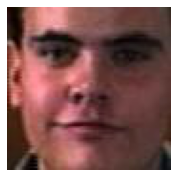

In [18]:
idx=250
print(my_predictor("test_data/"+all_test_images[idx]))
img = open_image("test_data/"+all_test_images[idx])
img.show()

In [19]:
import cv2
test_files=os.listdir("test_data")
os.makedirs("test_result",exist_ok=True)
i=0
for test_file in test_files:
  img=cv2.imread("test_data/"+test_file)
  cv2.imwrite("temp.jpg",img)
  ans_text=my_predictor("temp.jpg")
  font = cv2.FONT_HERSHEY_SIMPLEX 
  i+=1
  org = (0, 50) 
  fontScale = 2
  color = (255, 0, 0) 
  thickness = 4
  new_dimension = (720, 720)
  img_resized = cv2.resize(img, new_dimension)
  img = cv2.putText(img_resized, str(ans_text), org, font,fontScale, color, thickness, cv2.LINE_AA) 
  cv2.imwrite("test_result/"+str(i)+".jpg", img)

In [20]:
%cd "test_result"
!ffmpeg -framerate 2 -pattern_type glob -i '*.jpg' -s 1920x1080  \-c:v libx264 -r 1 -pix_fmt yuv420p ../faces_prediction_output.mp4
%cd ..

/content/test_result
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable

In [21]:
!pip install -U kora
!pip install requests
from kora.drive import upload_public

In [23]:
url = upload_public('faces_prediction_output.mp4')
print(url)

https://drive.google.com/uc?id=14r493z3ayjh0yoZVshlw4gM8Y9inck6b


In [24]:
from IPython.display import HTML
HTML(f"""<video src={'https://drive.google.com/uc?id=14r493z3ayjh0yoZVshlw4gM8Y9inck6b'} width=500 controls/>""")